In [11]:
import sys
import os

!pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
# !git clone https://github.com/salesforce/BLIP
# %cd BLIP
current_path = os.getcwd()
print(current_path)


Defaulting to user installation because normal site-packages is not writeable
/Users/phamgi/VC/BLIP
/Users/phamgi/VC/BLIP


In [12]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

def load_demo_image(image_size, device, img_url):
    # img_url = 'https://linkhay.mediacdn.vn/upload/media/92215.3RCF1640c7a5c15d87.resized.jpeg' 
    # raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
    raw_image = Image.open(img_url)  

    w, h = raw_image.size
    display(raw_image.resize((w,h)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

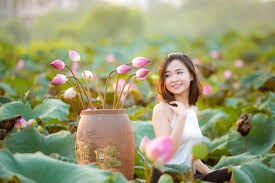

100%|██████████| 1.35G/1.35G [02:21<00:00, 10.2MB/s]


reshape position embedding from 900 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: in garden


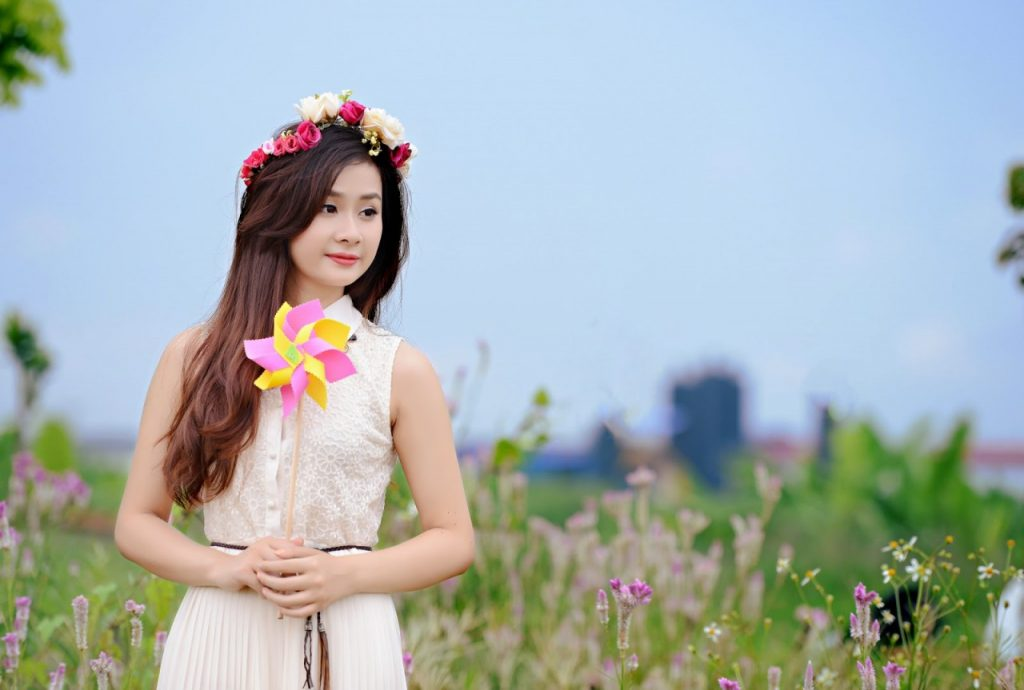

reshape position embedding from 900 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: field


In [16]:
import os
from PIL import Image
from models.blip import blip_decoder
from models.blip_vqa import blip_vqa

folder_path = "/Users/phamgi/VC/BLIP/dungpt/images"
image_list = []
image_size = 384
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
model_url_vqa = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"): # Only consider image files
        img_url = os.path.join(folder_path, filename);
        image = load_demo_image(image_size = image_size, device = device, img_url = img_url)
        
        # model = blip_decoder(pretrained = model_url, image_size = image_size, vit = 'base')
        # model.eval()
        # model = model.to(device)
        # with torch.no_grad():
        #     caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
        #     print('caption: '+caption[0])

        model = blip_vqa(pretrained=model_url_vqa, image_size=image_size, vit='base')
        model.eval()
        model = model.to(device)

        question = 'what is in the hand woman?'

        with torch.no_grad():
            answer = model(image, question, train=False, inference='generate') 
            print('answer: '+answer[0])


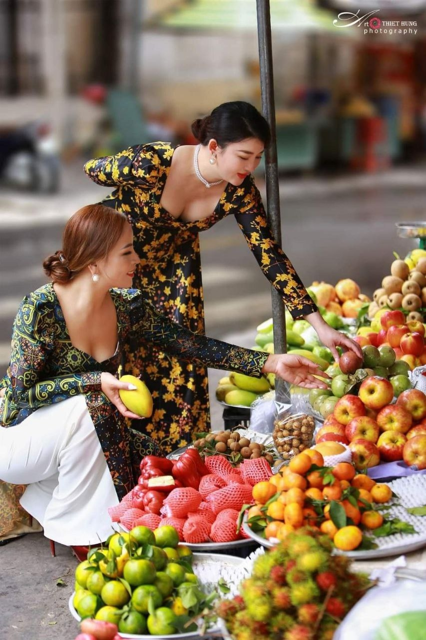

  0%|          | 0.00/1.35G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: on ground


In [33]:
# from models.blip_vqa import blip_vqa

# image_size = 480
# image = load_demo_image(image_size=image_size, device=device)     

# model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'
    
# model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
# model.eval()
# model = model.to(device)

# question = 'where is the woman sitting?'

# with torch.no_grad():
#     answer = model(image, question, train=False, inference='generate') 
#     print('answer: '+answer[0])

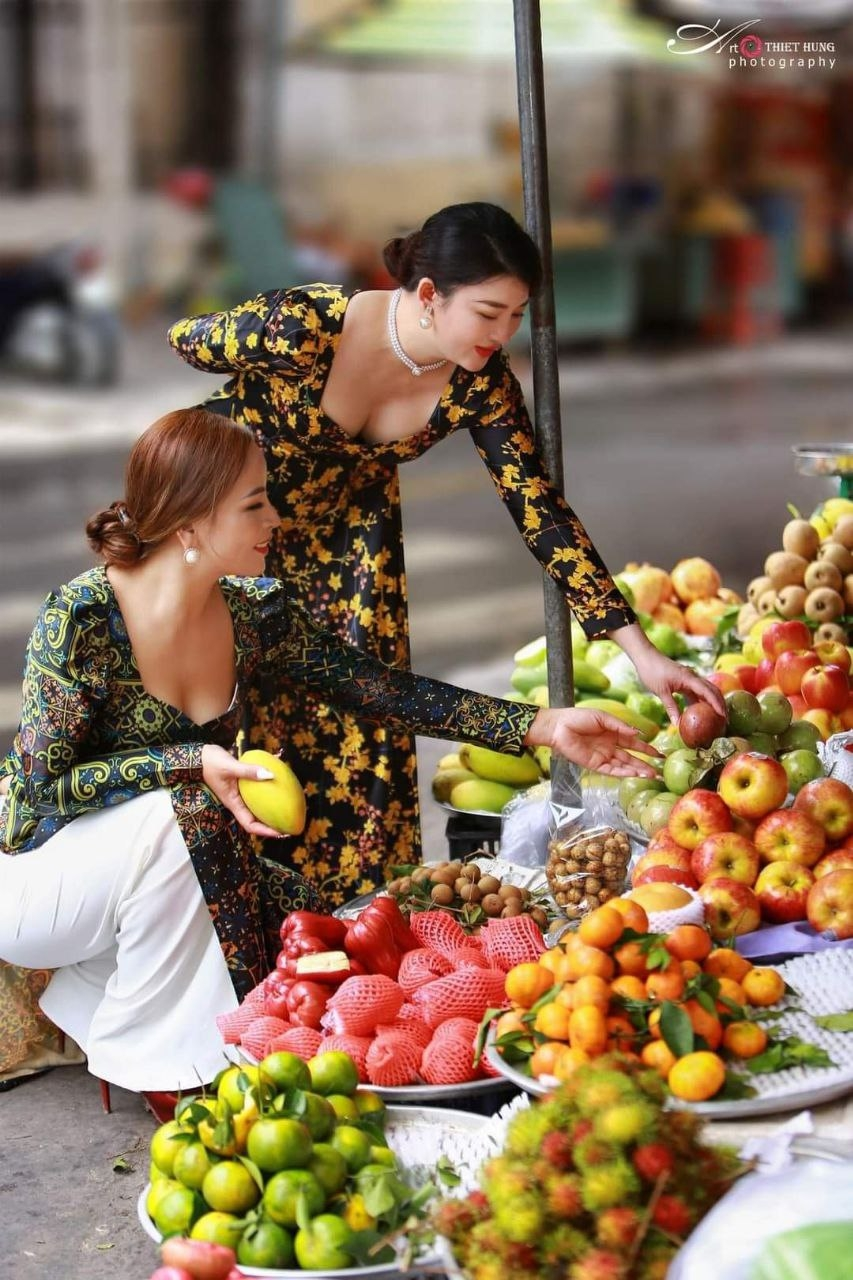

FileNotFoundError: [Errno 2] No such file or directory: 'configs/med_config.json'

In [8]:
from models.blip import blip_decoder

image_size = 384
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img_url = '/Users/phamgi/Downloads/92215.3RCF1640c7a5c15d87.resized.jpeg'
# img_url = 'https://linkhay.mediacdn.vn/upload/media/92215.3RCF1640c7a5c15d87.resized.jpeg'
image = load_demo_image(image_size = image_size, device = device, img_url = img_url)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
    
model = blip_decoder(pretrained = model_url, image_size = image_size, vit = 'base')
model.eval()
model = model.to(device)
question = 'how many wonem?'

with torch.no_grad():
    # beam search
    # caption = model.generate(image, sample = False, num_beams = 3, max_length = 20, min_length = 5) 
    # nucleus sampling
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])